## Imports

In [1]:
from keras.models import Model, Sequential
from keras.regularizers import l2
from keras import backend as K
from keras.optimizers import Adam
from keras import optimizers
#from skimage.io import imshow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from keras.backend.tensorflow_backend import set_session
from keras.applications import resnet50, vgg16, vgg19
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger, EarlyStopping
from keras.applications.resnet50 import preprocess_input
#from keras.applications.xception import preprocess_input
import os
import datetime
import json
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, Lambda, merge, Dense, Flatten,MaxPooling2D,Activation, Dropout
import glob
import cv2
from random import shuffle
from fastai.vision import *
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os



import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

from keras.layers import Embedding
from keras.layers import Dense,LSTM
from keras import Input
import numpy as np
np.random.seed(0)
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation,Reshape
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
import keras
from keras.models import load_model, Model
from keras.layers import Dense, Activation, Dropout, Input, LSTM, Reshape, Lambda, RepeatVector
from keras.initializers import glorot_uniform
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras import backend as K
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from keras.models import Sequential
import tensorflow as tf
from sklearn.metrics import roc_auc_score
 
from keras.layers import Dense
from keras.utils import np_utils
from keras.callbacks import Callback, EarlyStopping
from keras.layers import Bidirectional, Concatenate, Permute, Dot, Input, LSTM, Multiply
from keras.layers import RepeatVector, Dense, Activation, Lambda
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import load_model, Model
import random
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout, Lambda
from keras.optimizers import RMSprop
from keras import backend as K
import keras.backend as K
import numpy as np
import random

Using TensorFlow backend.


## Data

#### Downloading Images

In [2]:

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [0]:
!mkdir ~/.kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 33.4MB/s]
 98% 267M/271M [00:05<00:00, 54.4MB/s]
100% 271M/271M [00:05<00:00, 52.9MB/s]
100% 543M/543M [00:21<00:00, 28.7MB/s]
100% 543M/543M [00:21<00:00, 26.7MB/s]


In [0]:
from zipfile import ZipFile
zip = ZipFile('/content/train.zip')
zip.extractall()

#### Downloading Cats Images

In [0]:
folder = 'cats'
file = 'cats.txt'
path = Path('data/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [8]:
import os
import shutil

for filename in tqdm(os.listdir('/content/train/')):
  # if the file-name ends with jpg then Resize the image
    if filename.split('.')[0] == 'cat':
      shutil.move("/content/train/"+ str(filename), "/content/data/cats")

100%|██████████| 25000/25000 [00:00<00:00, 41507.35it/s]


#### Downloading Dogs Images

In [0]:
folder = 'dogs'
file = 'dogs.txt'
path = Path('data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)


In [10]:
for filename in tqdm(os.listdir('/content/train/')):
  # if the file-name ends with jpg then Resize the image
    if filename.split('.')[0] == 'dog':
      shutil.move("/content/train/"+ str(filename), "/content/data/dogs")

100%|██████████| 12500/12500 [00:00<00:00, 20335.81it/s]


#### Downloading Horse Images

In [0]:
folder = 'horse'
file = 'horse.txt'
path = Path('data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images('/content/data/horse/horse.txt', dest, max_pics=200)

verify_images('/content/data/horse/',delete=True)

#### Downloading Deer Images

In [0]:
folder = 'deer'
file = 'deer.txt'
path = Path('data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images('/content/data/deer/deer.txt', dest, max_pics=200)
verify_images('/content/data/deer/',delete=True)

## Transorming Images and creating Train and Test-Sets

In [17]:
import cv2
from skimage.transform import rescale, resize, downscale_local_mean
img = cv2.imread("/content/data/cats/cat.1071.jpg")
# resizing of IMAGE 
img_resized = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
print(img.shape,img_resized.shape)

(399, 500, 3) (224, 224, 3)


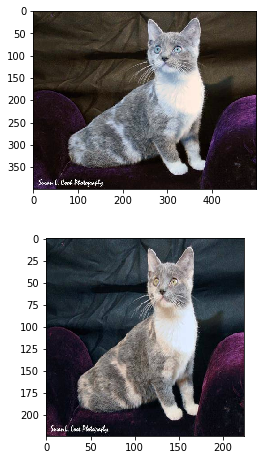

In [18]:
f, axarr = plt.subplots(2,figsize=(4,8))
axarr[0].imshow(img)

axarr[1].imshow(img_resized)

#### Function to Transform Images

In [0]:

from skimage.transform import rescale, resize, downscale_local_mean
from tqdm import tqdm
import cv2
def convert_images(path_images):
# store all the images in respective array
# we take 90 images per class
  array_images = np.zeros((90,224,224,3))

  i=0
  # shows the list of directories in the path
  for filename in tqdm(os.listdir(path_images)):
    
  # if the file-name ends with jpg,png,jpeg then Resize the image
    if i == 90:
      break
    else:  
      if filename.split('.')[-1] == 'jpg' or filename.split('.')[-1] == 'jpeg' or filename.split('.')[-1] == 'png':

        image_path = os.path.join(path_images, filename)
        img = cv2.imread(image_path)
        img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        array_images[i] = img
        i= i+1

  return array_images

In [20]:
array_images_cat = convert_images('/content/data/cats')

  1%|          | 72/12500 [00:00<00:35, 355.03it/s]


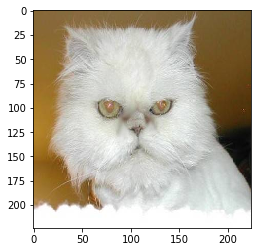

In [21]:
plt.imshow(array_images_cat[-2].astype('uint8'))

#### transforming and creating train,test images of CAT

In [0]:
cat_train = array_images_cat[:75]
cat_test = array_images_cat[cat_train.shape[0]:cat_train.shape[0]+15]

# adding the train labels to train_y as cat label is 0
train_y = []
for i in range(0,cat_train.shape[0]):
  train_y.append(0)

test_y = []
for i in range(cat_train.shape[0],cat_train.shape[0]+15):
  test_y.append(0)  

In [0]:
del array_images_cat

#### transforming and creating train,test images of DOG

In [24]:
array_images_dog = convert_images('/content/data/dogs')

dog_train = array_images_dog[:75]
dog_test = array_images_dog[dog_train.shape[0]:dog_train.shape[0]+15]

# adding the train labels to train_y as Dog label is 1
for i in range(0,dog_train.shape[0]):
  train_y.append(1)

for i in range(dog_train.shape[0],dog_train.shape[0]+15):
  test_y.append(1)

  1%|          | 69/12500 [00:00<00:36, 341.27it/s]


In [0]:
del array_images_dog

#### transforming and creating train,test images of HORSE

In [26]:
array_images_horse = convert_images('/content/data/horse')

horse_train = array_images_horse[:75]
horse_test = array_images_horse[horse_train.shape[0]:horse_train.shape[0]+15]
# adding the train labels to train_y as Horse Label is 2
for i in range(0,horse_train.shape[0]):
  train_y.append(2)

for i in range(horse_train.shape[0],horse_train.shape[0]+15):  
  test_y.append(2)

 96%|█████████▌| 93/97 [00:01<00:00, 55.42it/s]


In [0]:
del array_images_horse

#### transforming and creating train,test images of DEER

In [28]:
array_images_deer = convert_images('/content/data/deer')

deer_train = array_images_deer[:75]
deer_test = array_images_deer[deer_train.shape[0]:deer_train.shape[0]+15]
# adding the train labels to train_y as Deer Labels is 3
for i in range(0,deer_train.shape[0]):
  train_y.append(3)

for i in range(deer_train.shape[0],deer_train.shape[0]+15):
  test_y.append(3)  

100%|██████████| 96/96 [00:02<00:00, 45.49it/s]


In [0]:
del array_images_deer

#### train and Test sets which consists of all classes images

In [30]:
num_classes = 4
# we collect all the respective index of one particular class of Train Data
digit_indices_train = [np.where(np.array(train_y) == i)[0] for i in range(num_classes)]
digit_indices_train

[array([ 0,  1,  2,  3, ..., 71, 72, 73, 74]),
 array([ 75,  76,  77,  78, ..., 146, 147, 148, 149]),
 array([150, 151, 152, 153, ..., 221, 222, 223, 224]),
 array([225, 226, 227, 228, ..., 296, 297, 298, 299])]

In [31]:
num_classes = 4
# we collect all the respective index of one particular class of Test Data
digit_indices_test = [np.where(np.array(test_y) == i)[0] for i in range(num_classes)]
digit_indices_test

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 array([45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59])]

In [0]:
# we stack all the training and Testing Images of cat,Dog,Horse,Deer
from numpy import vstack
train_x = vstack((cat_train,dog_train,horse_train,deer_train))
test_x = vstack((cat_test,dog_test,horse_test,deer_test))

In [0]:
del cat_train,dog_train,horse_train,deer_train
del cat_test,dog_test,horse_test,deer_test


## Creating Data Pairs 

#### Function to create Pairs of Images

In [0]:
def create_pairs(x, digit_indices):
  
    pairs = []
    labels = []
    # n says which class has the least no of images
    n = min([len(digit_indices[d]) for d in range(num_classes)]) - 1

    for d in range(num_classes):

        for i in range(n):
          # z1,z2  has the same images of one classes  or consecutuve images of a class
          # we form 84 pairs of images where both images belong to same class
            z1, z2 = digit_indices[d][i], digit_indices[d][i + 1]
            # pairs of same class-Images
            pairs += [[x[z1], x[z2]]]
          # we add the same image Pairs Thrice
            for j in range(0,2):

              inc = random.randrange(1, n)
              z1,z2 = digit_indices[d][i], digit_indices[d][inc]
              pairs += [[x[z1], x[z2]]]

            

            inc = random.randrange(1, num_classes)
            # we increase the class no here
            # dn contain the other class which can be used in the pairs using digit_indices
            dn = (d + inc) % num_classes
            z1, z2 = digit_indices[d][i], digit_indices[dn][i]
            # z1,z2 contain images of different classes
            pairs += [[x[z1], x[z2]]]

          # we add the different image pairs thrice
            for j in range(0,2):

              inc = random.randrange(1, num_classes)
              dn = (d + inc) % num_classes

              inc_index = random.randrange(1, n)

              z1, z2 = digit_indices[d][inc_index], digit_indices[dn][i]
            # z1,z2 contain images of different classes
              pairs += [[x[z1], x[z2]]]


            # We add same pair images thrice of label=1
            # we add Different pair images thrice of label=0
            labels += [1,1,1,0,0,0]
            
    return np.array(pairs), np.array(labels)

#### creating train-Pairs and test Pairs

In [0]:
# creating pairs based on train_x and Digit_indices of train
train_pairs, train_y = create_pairs(train_x, digit_indices_train)
# creating pairs based on test_x and Digit_indices of Test
test_pairs,test_y = create_pairs(test_x,digit_indices_test)

In [36]:
train_pairs.shape,test_pairs.shape

((1776, 2, 224, 224, 3), (336, 2, 224, 224, 3))

## Model

In [37]:
from keras.applications import resnet50
convnet = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))













94658560/94653016 [==============================] - 1s 0us/step


In [38]:
# last Layer of Resnet Model-Freezed and take encoding of last layer of resnet
x = convnet.output
x = Flatten()(x)
# Adding Few last Dense layers to Train the model
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(256,activation='relu')(x)
x= Dropout(0.25)(x)
x = Dense(256,activation='relu')(x)
preds = Dense(18, activation='sigmoid')(x) 
convnet = Model(inputs=convnet.input, outputs=preds)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# left input of the model of shape = (224,224,3)
left_input = Input((224,224,3))
# right input of the model of shape = (224,224,3)
right_input = Input((224,224,3))

# Converting the input image to Encoding based on the Resnet Model and we intialise and train last few Dense layers
# Encoding of last layer of Convnet
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

# Difference between Encodings of two model's
Euc_layer = Lambda(lambda tensor:K.abs(tensor[0] - tensor[1]))
# taking Euclidean distance of model
Euc_distance = Euc_layer([encoded_l, encoded_r])
# Making a Sigmoid of the Distance 
prediction = Dense(1,activation='sigmoid')(Euc_distance)
# Intializing Inputs and output's of Model
siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)

In [0]:
from keras import backend as K
K.clear_session()

## Data Augmentation of Images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# creating a Data Augmentation Generator based on rotation,Flips,Whitening,Zoom
train_gen = ImageDataGenerator(
        rotation_range=80,
        zca_whitening=True,
        vertical_flip=True,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

#### checking Original Image

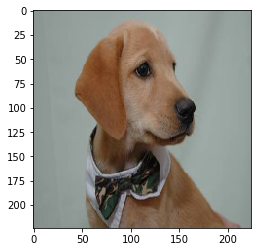

In [41]:
from matplotlib import pyplot
pyplot.imshow(train_pairs[10,1].astype('uint8'))

#### Checking Augmented images of Original Image

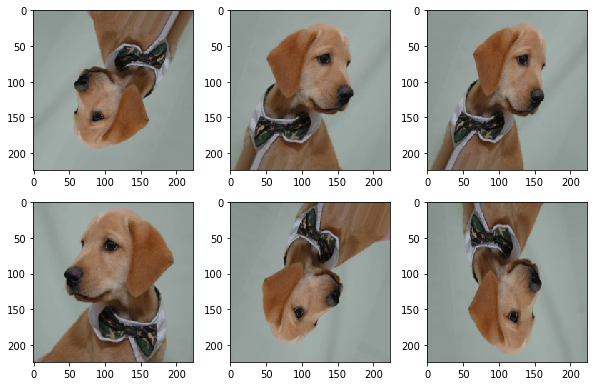

In [42]:
from numpy import expand_dims
from matplotlib import pyplot


width = 10
height = 10
plt.figure(figsize=(width, height))


samples = expand_dims(train_pairs[10,1], 0)
# create image data augmentation generator

# prepare iterator
it = train_gen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(6):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [0]:
for layer in convnet.layers[48:]:
  
	layer.trainable = True

In [44]:
from keras import optimizers
# We use the SGD optimizer
optim = optimizers.SGD(lr=0.001, decay=.01, momentum=0.9, nesterov=True)
siamese_net.compile(loss="binary_crossentropy",optimizer=optim,metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Creating Model CheckPoint

In [0]:
from keras.callbacks import ModelCheckpoint

# creating a model checkpoint which monitirs the training Loss 
# Model stores the Parameters of Best Model which has low training-Loss
filepath = "/content/gdrive/My Drive/siamese/weights-improvement-Resnet-LastLayer-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

## training the Model using Augmented Training and Test Pairs

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# training the model using Train Generator
# Each time training Images generates 16 augmented images for one image

siamese_net.fit_generator(train_gen.flow([train_pairs[:,0],train_pairs[:,1]], train_y,batch_size=16),
                                 steps_per_epoch = 128,
          epochs=60,
          verbose=1,
          validation_data = ([test_pairs[:,0],test_pairs[:,1]],test_y),
          callbacks=callbacks_list)



Epoch 1/60
128/128 [==============================] - 160s 1s/step - loss: 0.7032 - acc: 0.4995 - val_loss: 0.6798 - val_acc: 0.5298

Epoch 00001: val_loss improved from inf to 0.67978, saving model to /content/gdrive/My Drive/siamese/weights-improvement-01-0.53.hdf5
Epoch 2/60
128/128 [==============================] - 133s 1s/step - loss: 0.6873 - acc: 0.5459 - val_loss: 0.6393 - val_acc: 0.6429

Epoch 00002: val_loss improved from 0.67978 to 0.63933, saving model to /content/gdrive/My Drive/siamese/weights-improvement-02-0.64.hdf5
Epoch 3/60
128/128 [==============================] - 133s 1s/step - loss: 0.6501 - acc: 0.6230 - val_loss: 0.5870 - val_acc: 0.7173

Epoch 00003: val_loss improved from 0.63933 to 0.58695, saving model to /content/gdrive/My Drive/siamese/weights-improvement-03-0.72.hdf5
Epoch 4/60
128/128 [==============================] - 132s 1s/step - loss: 0.6090 - acc: 0.6992 - val_loss: 0.5745 - val_acc: 0.7679

Epoch 00004: val_loss improved from 0.58695 to 0.574

KeyboardInterrupt: ignored

In [0]:
siamese_net.load_weights('/content/gdrive/My Drive/siamese/weights-improvement-32-0.80.hdf5')

In [47]:
siamese_net.fit_generator(train_gen.flow([train_pairs[:,0],train_pairs[:,1]], train_y,batch_size=16),
                                 steps_per_epoch = 128,
          epochs=1,
          verbose=1,
          validation_data = ([test_pairs[:,0],test_pairs[:,1]],test_y),
          callbacks=callbacks_list)



Epoch 1/1
128/128 [==============================] - 159s 1s/step - loss: 0.4889 - acc: 0.7822 - val_loss: 0.4706 - val_acc: 0.8125

Epoch 00001: val_loss improved from inf to 0.47062, saving model to /content/gdrive/My Drive/siamese/weights-improvement-Resnet-LastLayer-01-0.81.hdf5


In [0]:
test_pairs.shape

(336, 2, 224, 224, 3)

## Checking the model using Test_pairs

In [0]:
def show_similarity_images(i,j):
  # similarity of two images using predict
  # random.randrange(0,2) generates number of 0 or 1..
  
  
  similarity  = siamese_net.predict([test_pairs[i,0].reshape(1,224,224,3),test_pairs[j,1].reshape(1,224,224,3)])
  f, axarr = plt.subplots(2,figsize=(4,8))
  axarr[0].imshow(test_pairs[i,0].astype('uint8'))

  axarr[1].imshow(test_pairs[j,1].astype('uint8'))
  return similarity

array([[0.650285]], dtype=float32)

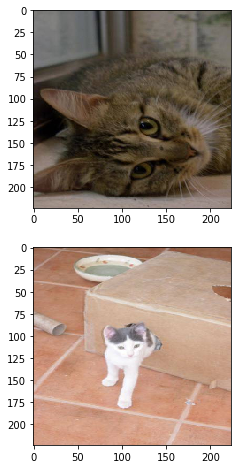

In [0]:
show_similarity_images(14,12)

array([[0.56232]], dtype=float32)

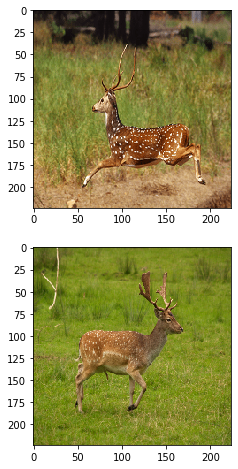

In [0]:
show_similarity_images(random.randrange(1, test_pairs.shape[0]),random.randrange(1, test_pairs.shape[0]))

array([[0.115611]], dtype=float32)

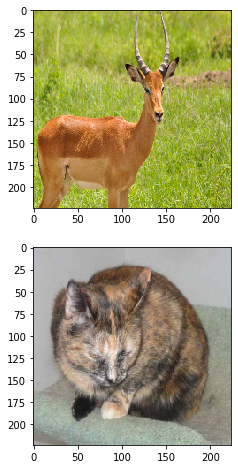

In [0]:
show_similarity_images(random.randrange(1, test_pairs.shape[0]),random.randrange(1, test_pairs.shape[0]))

array([[0.612714]], dtype=float32)

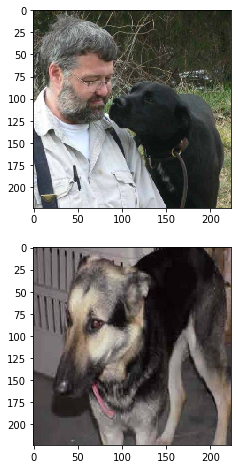

In [0]:
show_similarity_images(random.randrange(1, test_pairs.shape[0]),random.randrange(1, test_pairs.shape[0]))

array([[0.630894]], dtype=float32)

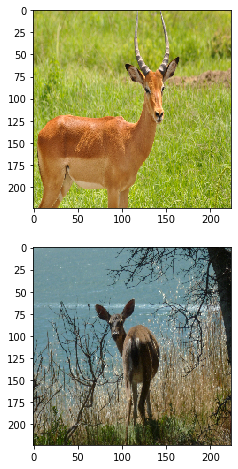

In [0]:
show_similarity_images(random.randrange(1, test_pairs.shape[0]),random.randrange(1, test_pairs.shape[0]))

array([[0.570057]], dtype=float32)

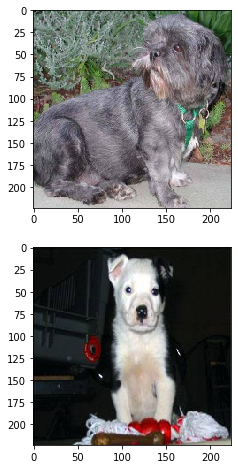

In [0]:
show_similarity_images(random.randrange(1, test_pairs.shape[0]),random.randrange(1, test_pairs.shape[0]))